# Credit Card Customer Churn Prediction

## 1. Load & Inspect the Data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("BankChurners.csv")

# Display shape and column names
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Preview the first 5 rows
df.head()


Shape: (10127, 21)
Columns: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [2]:
# Check data types and non-null counts
df.info()

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\330099938.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


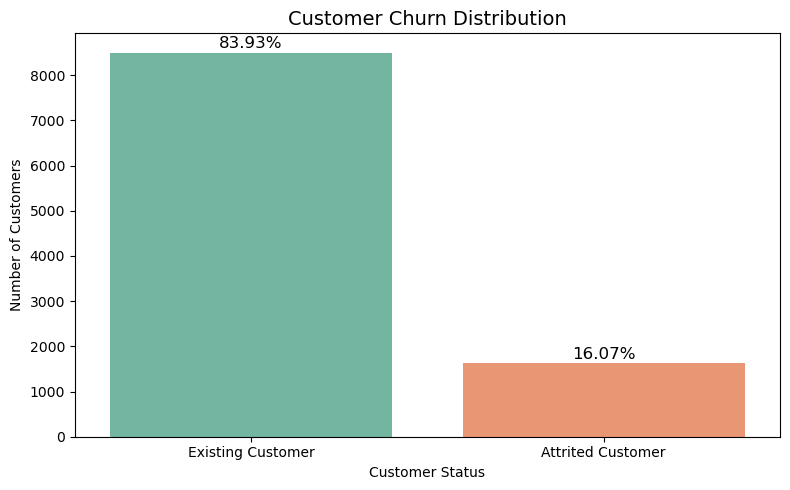

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
target_counts = df['Attrition_Flag'].value_counts()
target_percent = df['Attrition_Flag'].value_counts(normalize=True) * 100

# Create figure
plt.figure(figsize=(8, 5))
sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    palette='Set2'
)

# Annotate with percentage on top of bars
for i, (count, percent) in enumerate(zip(target_counts.values, target_percent)):
    plt.text(i, count + 100, f'{percent:.2f}%', ha='center', fontsize=12)

# Customize plot
plt.title('Customer Churn Distribution', fontsize=14)
plt.ylabel('Number of Customers')
plt.xlabel('Customer Status')
plt.tight_layout()
plt.show()


### Dataset Overview

**File Name:** *BankChurners.csv*  
**Shape:** 10,127 rows × 21 columns  
**Source:** customer behavior dataset from a financial institution

### Initial Inspection

- All features successfully loaded and readable  
- No missing values detected across any columns (*df.isnull().sum()* returned all zeros)  
- Includes a mix of:

  - **Demographics:** *Customer_Age*, *Gender*, *Education_Level*, *Income_Category*  
  - **Account Info:** *Months_on_book*, *Credit_Limit*, *Avg_Open_To_Buy*  
  - **Behavioral Metrics:** *Total_Trans_Amt*, *Total_Trans_Ct*, *Total_Ct_Chng_Q4_Q1*

### Target Variable – *Attrition_Flag*

**Classes:**

- *Existing Customer*: 8,500 (≈ 83.91%)  
- *Attrited Customer*: 1,627 (≈ 16.09%)

**Insight:** Class imbalance is present and will need to be addressed during modeling.


In [4]:
# drop irrelevant column (client ID)
df.drop(columns='CLIENTNUM', inplace=True)

## 2. Exploratory Data Analysis (EDA)

I'll break it down into two parts:

### 2.1. Univariate Analysis

#### 2.1.1.Numerical Features  
Histograms help understand *distributions*:


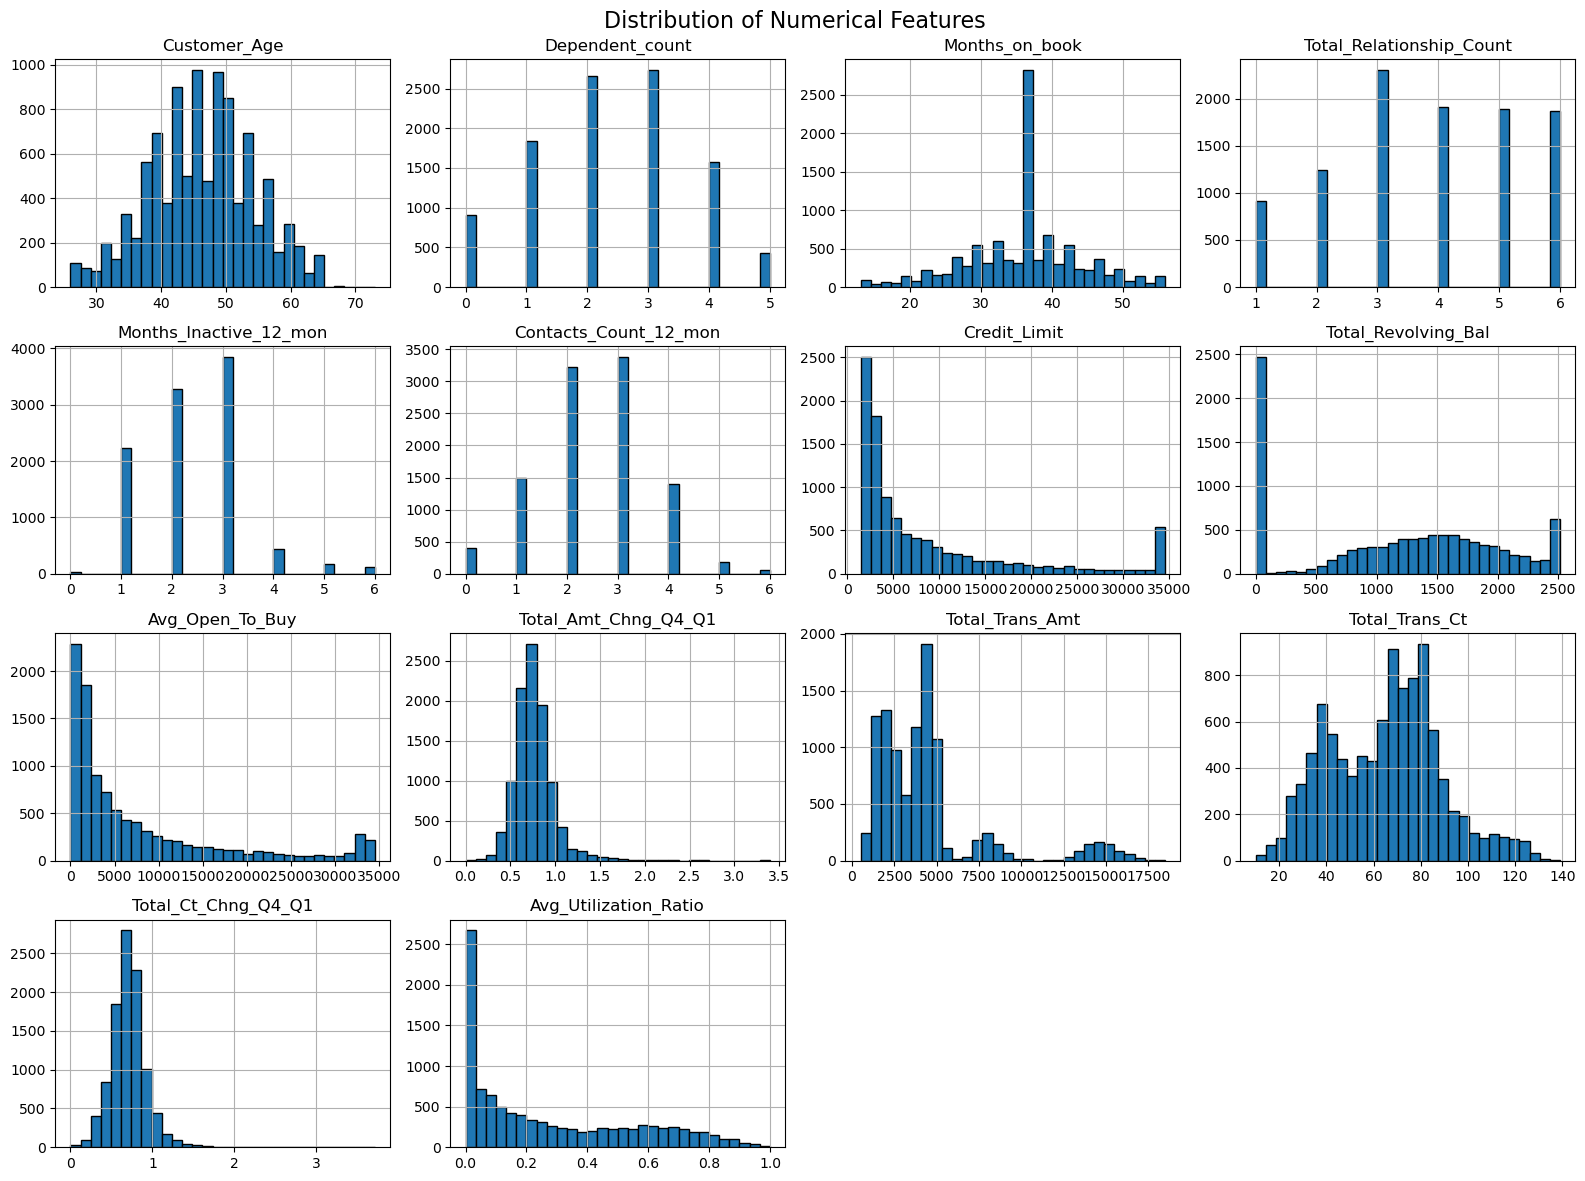

In [5]:
# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Plot histograms
df[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


#### 2.1.2. Categorical Features  
Bar plots for *categorical value counts*:

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\4218138130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=order)


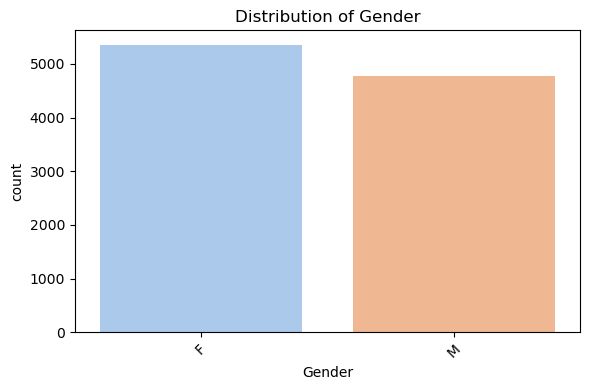

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\4218138130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=order)


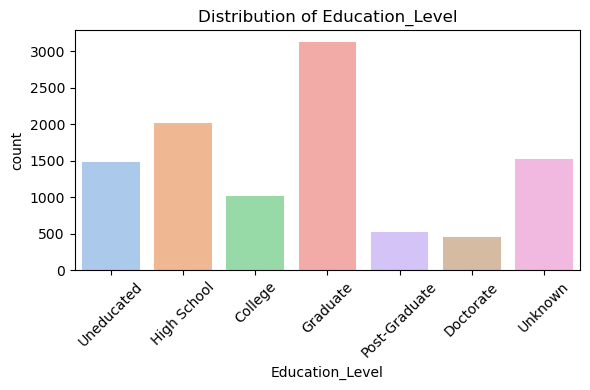

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\4218138130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=order)


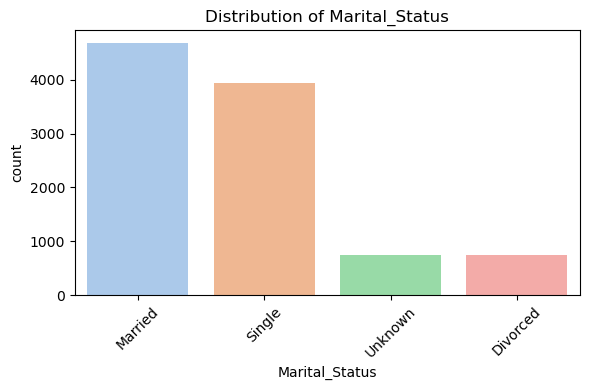

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\4218138130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=order)


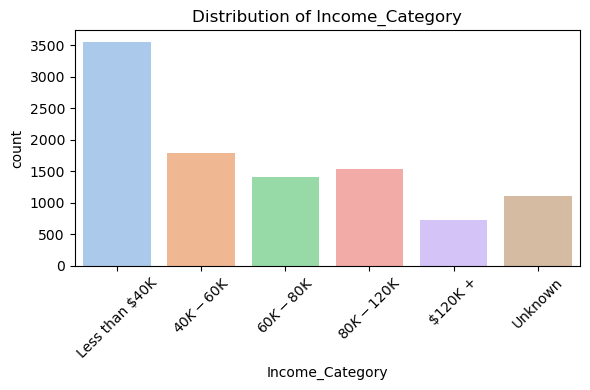

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\4218138130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=order)


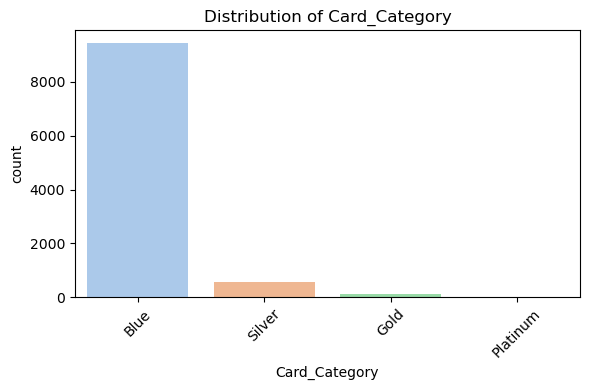

In [6]:
# Custom order for ordinal features
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Attrition_Flag')  # Exclude target for now

# Plot with custom order for specific columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    
    # Apply custom order only to ordinal columns
    if col == 'Education_Level':
        order = education_order
    elif col == 'Income_Category':
        order = income_order
    else:
        order = df[col].value_counts().index  # Default frequency order

    sns.countplot(data=df, x=col, palette='pastel', order=order)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 2.2. Bivariate Analysis (Feature vs. Churn)

I’ll explore how each *feature* varies across *churn status*.


#### 2.2.1. Categorical Features vs. Churn

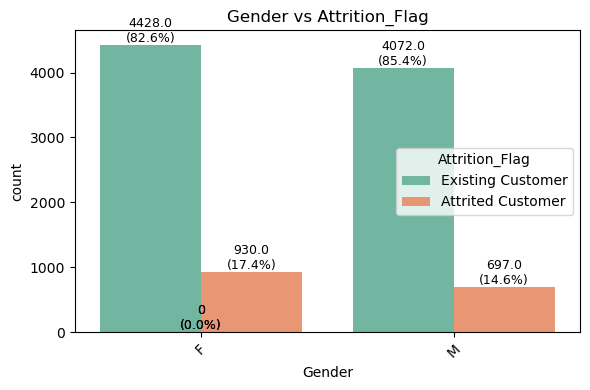

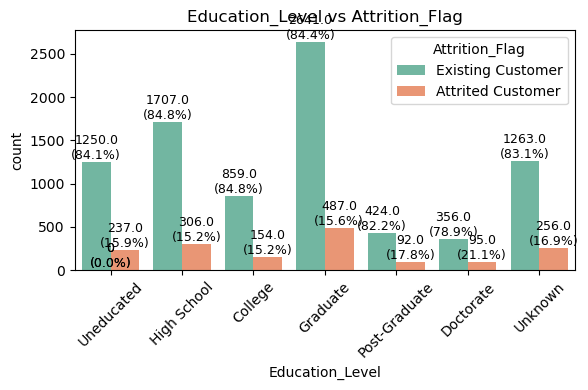

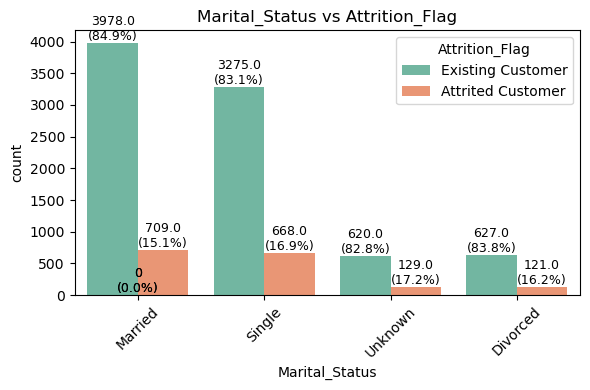

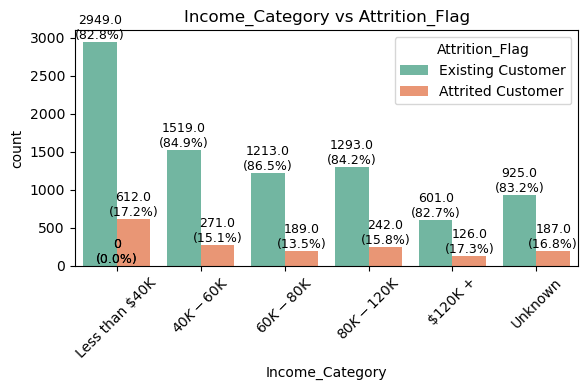

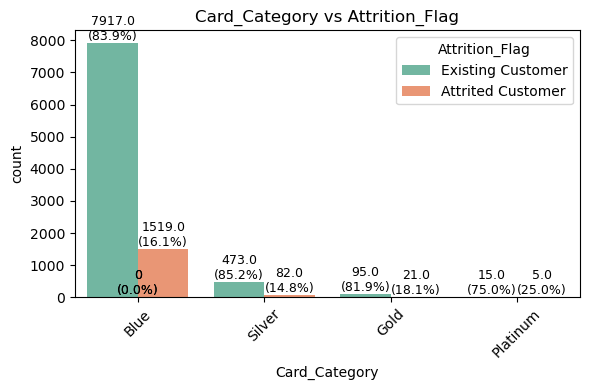

In [7]:

for col in cat_cols:
    plt.figure(figsize=(6, 4))

    if col == 'Education_Level':
        order = education_order
    elif col == 'Income_Category':
        order = income_order
    else:
        order = df[col].value_counts().index

    # Plot
    ax = sns.countplot(data=df, x=col, hue='Attrition_Flag', palette='Set2', order=order)
    plt.title(f'{col} vs Attrition_Flag')
    plt.xticks(rotation=45)

    # Annotate with percentage within each category group
    category_totals = df[col].value_counts()

    for p in ax.patches:
        height = p.get_height()
        x_val = p.get_x() + p.get_width() / 2
        hue_level = p.get_label().split('=')[-1].strip() if '=' in p.get_label() else ''
        group = p.get_x() + p.get_width() / 2
        x_cat = p.get_x() + p.get_width() / 2
        x_idx = int(p.get_x() + p.get_width() / 2)

        # Extract the x-axis label based on the position
        x_label = p.get_x() + p.get_width() / 2
        label = p.get_label()
        x_index = int(p.get_x() + p.get_width() / 2)
        x_tick = p.get_x() + p.get_width() / 2
        x_category = p.get_x() + p.get_width() / 2

        group_label = p.get_x() + p.get_width() / 2
        bar_label = p.get_label()

        # Find category name from the bar's x location
        idx = round(p.get_x() + p.get_width() / 2)
        try:
            x_name = order[idx]
            total_in_group = df[df[col] == x_name].shape[0]
            percent = height / total_in_group * 100 if total_in_group > 0 else 0
            ax.annotate(f'{height}\n({percent:.1f}%)', (x_val, height), ha='center', va='bottom', fontsize=9)
        except IndexError:
            continue

    plt.tight_layout()
    plt.show()


**Key Observations from the Plots**

1. **Gender**  
The dataset is slightly *female-dominant*.  
Churn rates appear similar across genders, with possibly a slightly higher attrition among *female customers* (17.4% vs 14.6%).

2. **Education_Level**  
Most customers are *Graduate* or *High Schooler*.  
Attrition seems more prominent among customers with *Post-Graduate* (17.8%) and *Doctorate* (21.1%) backgrounds, suggesting *education may influence loyalty*.

3. **Marital_Status**  
*Married* customers make up the majority.  
*Single* customers show a relatively higher proportion of churn compared to *Married* (16.9% vs 15.1%).

4. **Income_Category**  
Most customers earn *less than 80K*.  
Attrition seems lowest among the *medium-income earners (60K - 80K)* (13.5%), and highest among both *high-income group (120K+)* and *low-income group (< 40K)* (17.3%), indicating a possible more loyalty among medium-income group.

5. **Card_Category**  
The majority hold a *Blue* card.  
*Gold*, and *Platinum* cards have very few users, but interestingly show a *higher relative churn rate* compared to *Blue* cards (18.1% and 25% vs 16.1%).


#### 2.2.2. Numerical Features vs. Churn  
Box plots show *value distributions* for each *churn class*: (Look for features with clear separation between the two classes)

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


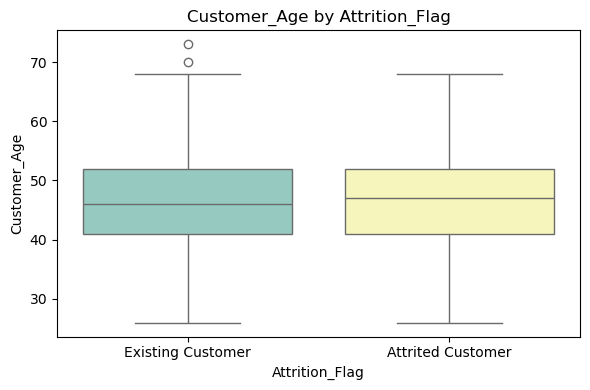

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


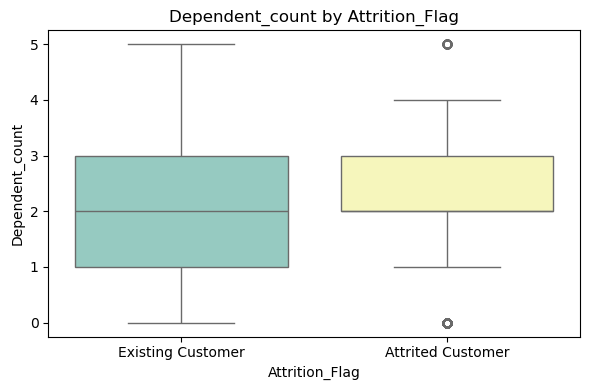

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


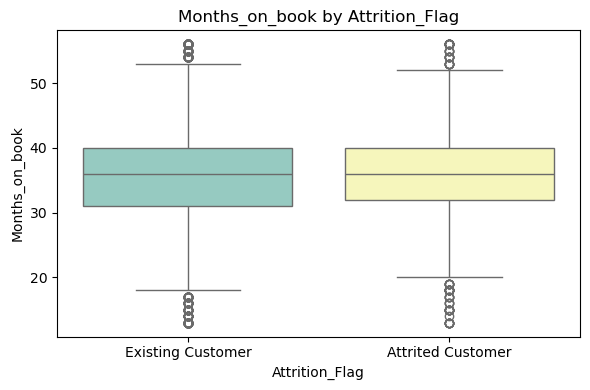

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


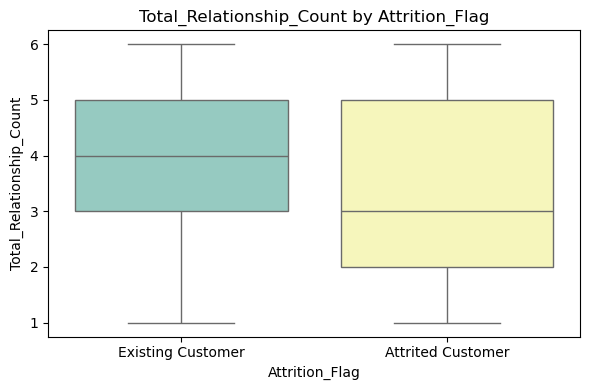

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


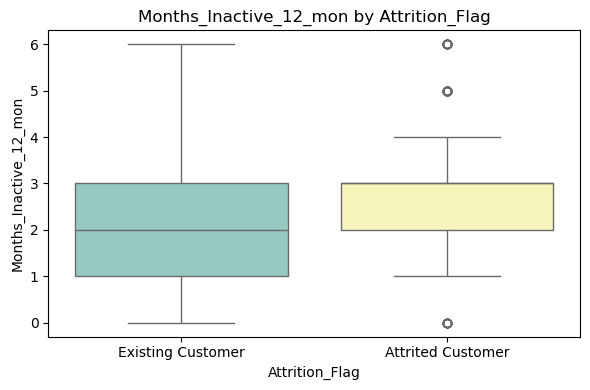

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


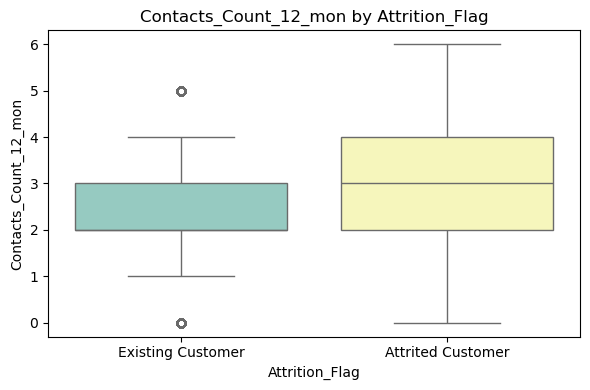

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


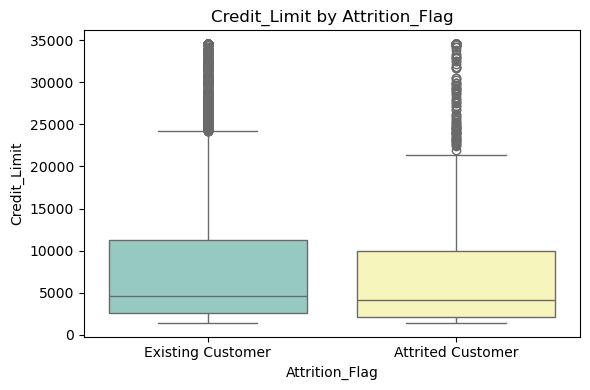

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


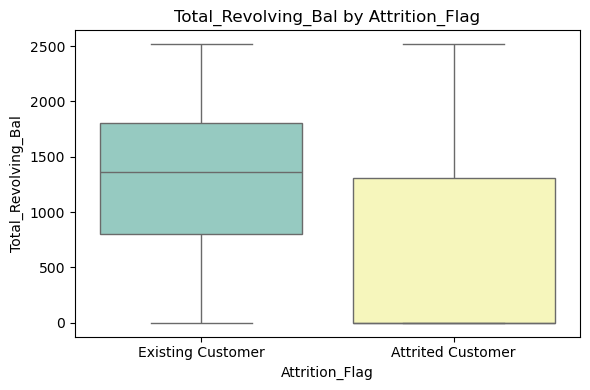

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


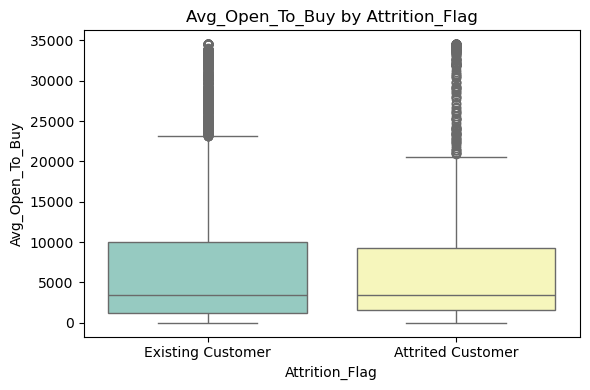

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


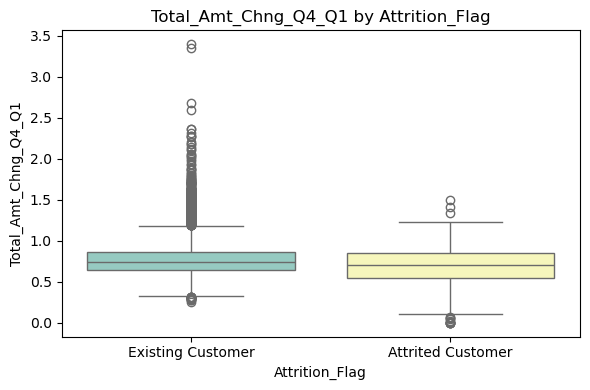

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


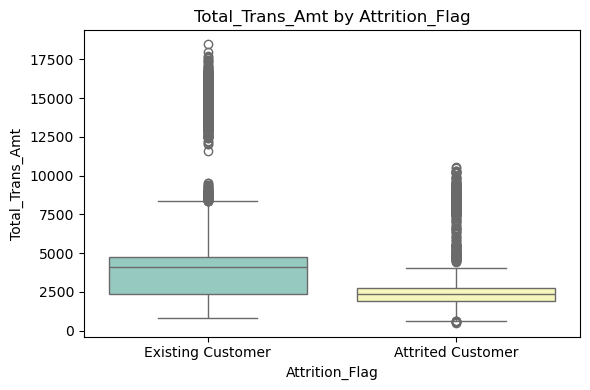

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


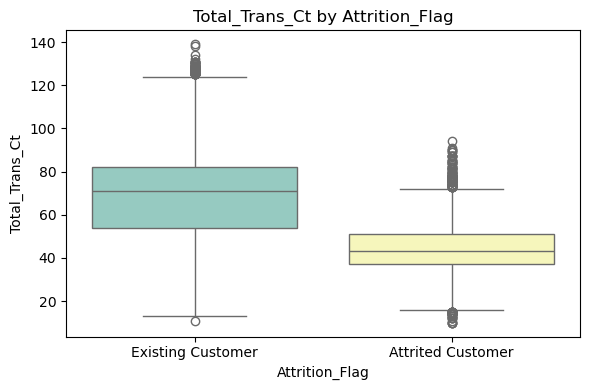

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


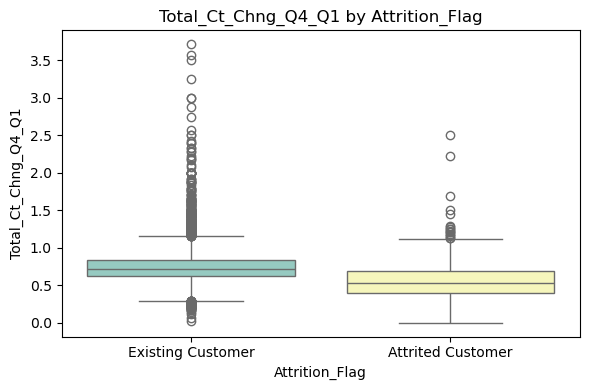

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\668963883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')


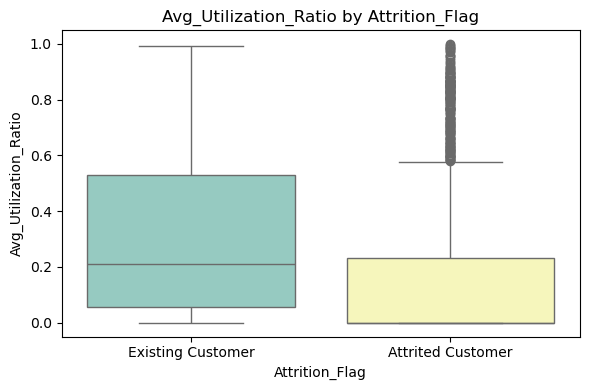

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Attrition_Flag', y=col, palette='Set3')
    plt.title(f'{col} by Attrition_Flag')
    plt.tight_layout()
    plt.show()


**Key Insights from Numerical Feature Distributions**

1. **Customer_Age**  
*Attrited customers* are slightly older on average than *existing ones*.  
*Age* could not be a strong churn predictor.

2. **Dependent_count**  
There is a significant difference between the two groups.  
May be *moderate predictive* of churn.

3. **Months_on_book**  
No major difference between the two groups.

4. **Total_Relationship_Count**  
*Existing customers* have higher relationship counts (more products/accounts).  
*Strong candidate* for churn prediction.

5. **Months_Inactive_12_mon**  
Clear separation: *Attrited customers* have more *inactive months*.  
*High predictive potential.*

6. **Contacts_Count_12_mon**  
*Attrited customers* contact more frequently — possibly due to *dissatisfaction or issues*.

7. **Credit_Limit** & **Avg_Open_To_Buy**  
*Churners* often have *lower credit limits* and *less available credit*.  
May indicate *lower-value clients* or *frustration with restrictions*.

8. **Total_Trans_Amt** & **Total_Trans_Ct**  
*Existing customers* are more active in spending and transactions.  
These are *highly predictive churn features*.

9. **Total_Revolving_Bal**  
*low balances* among *churners*.

10. **Total_Ct_Chng_Q4_Q1** & **Total_Amt_Chng_Q4_Q1**  
*Churners* show *less change in activity* — perhaps due to *disengagement*.  
*Important behavioral churn indicators.*


### 2.3. Correlation Heatmap

#### 2.3.1. Correlation of Numerical Features with each other

To understand *relationships* among *numerical variables*:

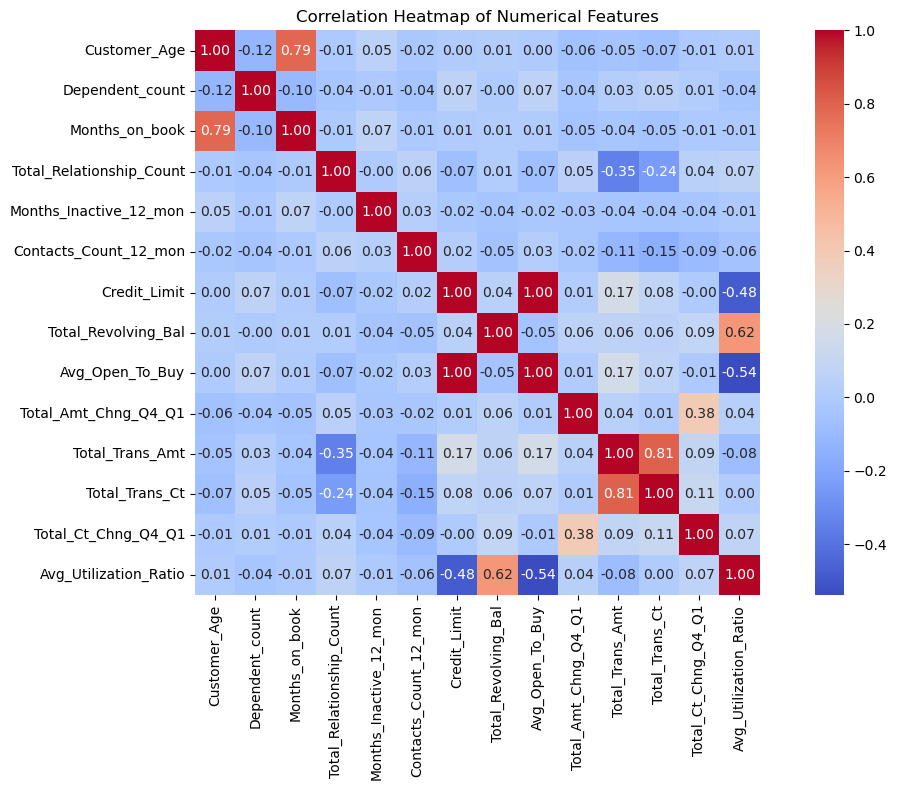

In [9]:
import numpy as np

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


**Key Interpretations from the Correlation Matrix**

**Strong Positive Correlations**

- *Credit_Limit* ↔ *Avg_Open_To_Buy* (1.00)  
  These are *highly redundant*. We can likely *drop one* to reduce multicollinearity.

- *Total_Trans_Ct* ↔ *Total_Trans_Amt* (0.81)  
  Indicates that *more transactions* generally mean *more spending*.

- *Customer_Age* ↔ *Months_on_book* (0.79)  
  *Older customers* tend to have *longer tenure*.

- *Total_Revolving_Bal* ↔ *Avg_Utilization_Ratio* (0.62)  
  Suggests that an *increase in transaction amount* is associated with *higher total spend*.

**Moderate Correlations**

- *Avg_Utilization_Ratio* ↔ *Credit_Limit* (-0.48)  
- *Avg_Utilization_Ratio* ↔ *Avg_Open_To_Buy* (-0.54)


#### 2.3.2. Correlation of Numerical Features with Target Variable

C:\Users\sahno\AppData\Local\Temp\ipykernel_20040\1163737743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')


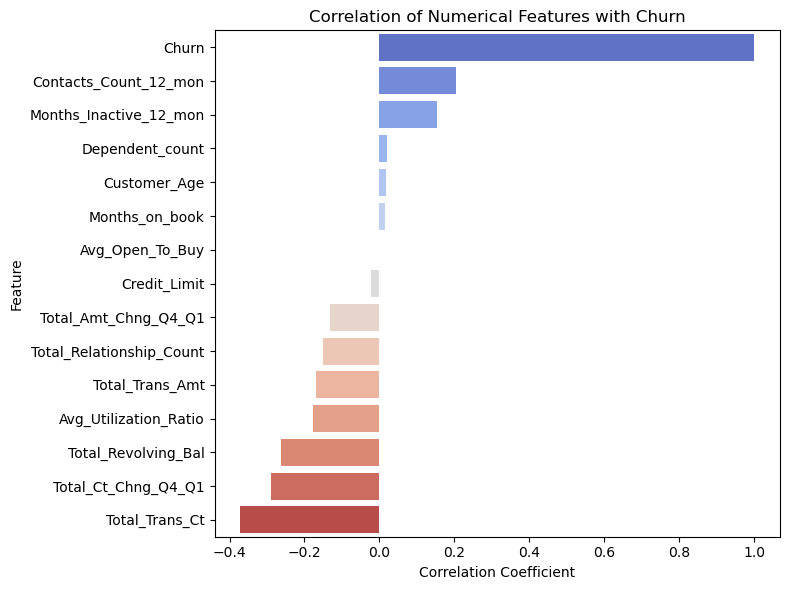

In [10]:
# First, encode the target variable: 1 if Attrited Customer, 0 if Existing Customer
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Append 'Churn' to the list of numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Calculate correlations with the target
corr_with_target = df[numeric_cols].corr()['Churn'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Top Correlated Features with Churn**

**Top Positively Correlated Features** *(more churn when higher)*

- *Months_Inactive_12_mon*  
- *Contacts_Count_12_mon*

**Top Negatively Correlated Features** *(more churn when lower)*

- *Total_Trans_Ct*  
- *Total_Trans_Amt* 
- *Total_Ct_Chng_Q4_Q1*
- *Total_Revolving_Bal*
- *Avg_Utilization_Ratio*
- *Total_Relationship_Count*  
- *Total_Amt_Chng_Q4_Q1*


## 3. Data Preprocessing

In [15]:
# Feature Selection: drop old target variable and remove multicoliniarity
df_reduced = df.drop(columns=['Attrition_Flag', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Months_on_book'])

# Identify categorical columns again
cat_cols = df_reduced.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert ordinal features to categorical with ordered categories
df_reduced['Education_Level'] = pd.Categorical(df_reduced['Education_Level'], categories=education_order, ordered=True)
df_reduced['Income_Category'] = pd.Categorical(df_reduced['Income_Category'], categories=income_order, ordered=True)

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df_reduced, columns=cat_cols, drop_first=True)

# Convert all bool columns to integers (0 and 1)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})

# Show shape and sample of processed data
df_encoded.shape, df_encoded.head()

((10127, 30),
    Customer_Age  Dependent_count  Total_Relationship_Count  \
 0            45                3                         5   
 1            49                5                         6   
 2            51                3                         4   
 3            40                4                         3   
 4            40                3                         5   
 
    Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
 0                       1                      3       12691.0   
 1                       1                      2        8256.0   
 2                       1                      0        3418.0   
 3                       4                      1        3313.0   
 4                       1                      0        4716.0   
 
    Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
 0                  777                 1.335              42   
 1                  864                 1.541              33   
 2     

In [16]:
from sklearn.preprocessing import StandardScaler
import joblib

# Separate features and target
X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler using joblib
scaler_path = "churn_scaler.pkl"
joblib.dump(scaler, scaler_path)

# Return scaled shape and scaler path
X_scaled.shape, scaler_path

((10127, 29), 'churn_scaler.pkl')

In [18]:
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)   # Stratified by Churn to Maintain the same churn ratio in both sets

# Output the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8101, 29), (2026, 29), (8101,), (2026,))

## 4. Models training

### 4.1. Models training and comparison

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define and initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'rf_model': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

# Convert results to DataFrame for display
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

results_df


D:\Users\sahnoun\anaconda3\envs\churn_env\lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:35] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,XGBoost,0.934353,0.858209,0.707692,0.775717,0.960081
1,rf_model,0.924975,0.874459,0.621538,0.726619,0.945512
2,Logistic Regression,0.894373,0.760563,0.498462,0.602230,0.886411
3,Naive Bayes,0.875617,0.640927,0.510769,0.568493,0.868251


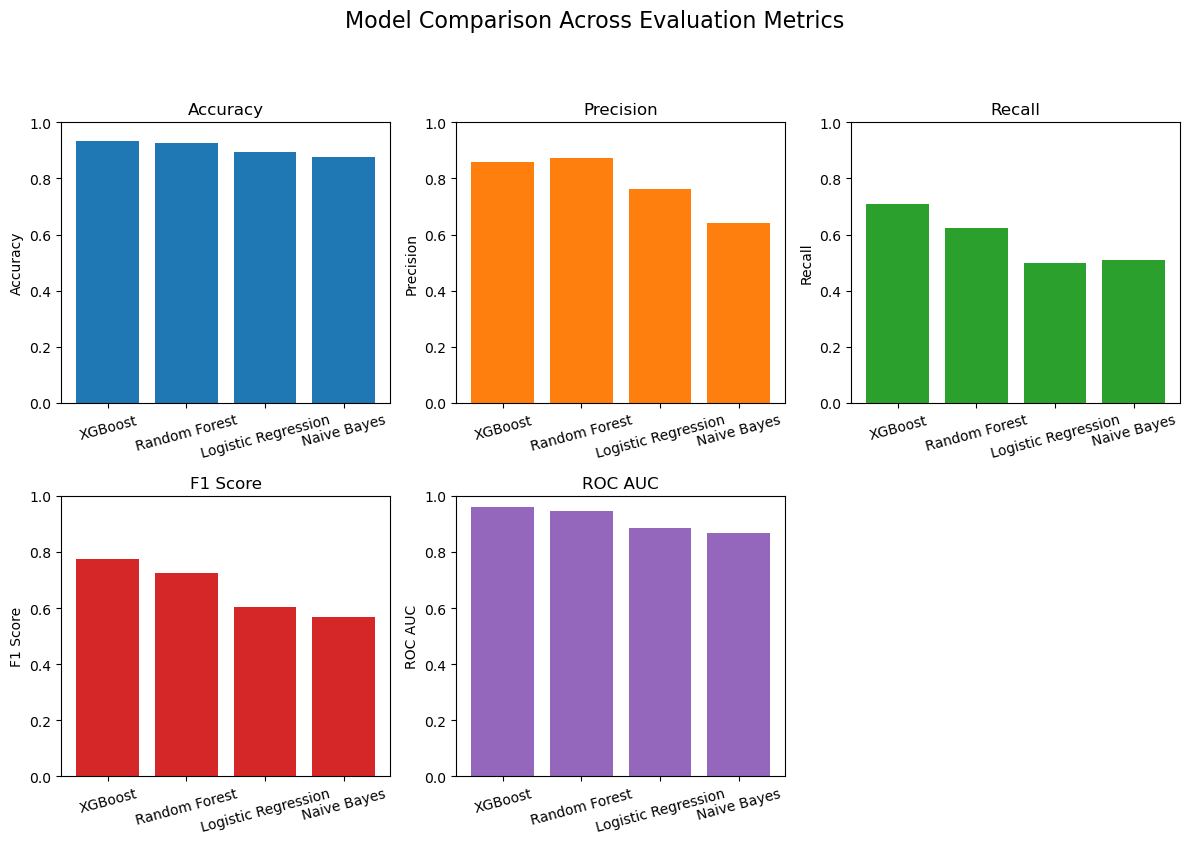

In [28]:

# Reconstruct the results DataFrame from earlier
results_data = {
    'Model': ['XGBoost', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': [0.934353, 0.924975, 0.894373, 0.875617],
    'Precision': [0.858209, 0.874459, 0.760563, 0.640927],
    'Recall': [0.707692, 0.621538, 0.498462, 0.510769],
    'F1 Score': [0.775717, 0.726619, 0.602230, 0.568493],
    'ROC AUC': [0.960081, 0.945512, 0.886411, 0.868251]
}
results_df = pd.DataFrame(results_data)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.bar(results_df['Model'], results_df[metric], color=colors[i])
    plt.title(metric)
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)
    plt.tight_layout()

plt.suptitle("Model Comparison Across Evaluation Metrics", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


**Best Overall Performer: XGBoost**

- *F1 Score:* 0.776  
- *Precision:* 0.858  
- *Recall:* 0.707  
- *ROC AUC:* 0.960  

*XGBoost* is not only accurate but also strong at identifying churners (*high recall + AUC*).

**Random Forest**

Also performed well, but slightly lower *recall* than XGBoost.  
Excellent *precision* (0.874) → fewer false positives.

**Logistic Regression**

Decent *baseline model*.  
*F1 Score* and *recall* lag behind tree-based models.

**Naive Bayes**

Simplest model, quickest to train.  
Performance lower than others — better suited as a *benchmark*.


### 4.2. Feature Importances

D:\Users\sahnoun\anaconda3\envs\churn_env\lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:35] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


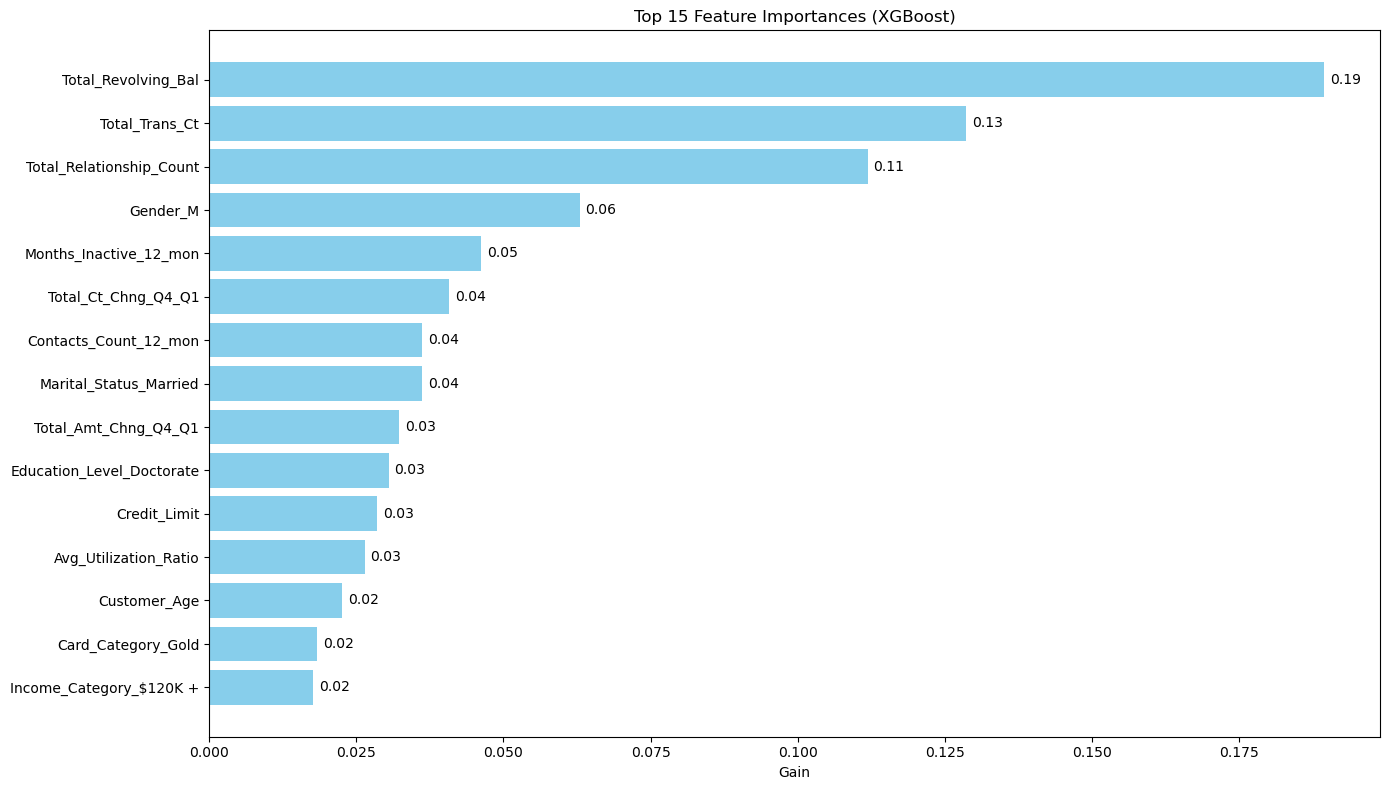

In [41]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Scale using StandardScaler but keep as DataFrame
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train/test split with DataFrame to preserve column names
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost on DataFrame with named columns
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
features = X_train_df.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot with rounded values
plt.figure(figsize=(14, 8))
bars = plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Gain')
plt.title('Top 15 Feature Importances (XGBoost)')

# Annotate with 2-decimal formatted values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.savefig("feature_importances_plot.png", dpi=300, bbox_inches='tight')
#plt.show()

**XGBoost Feature Importances (by Gain)**

This plot shows how much each feature contributes to improving the model’s decision trees, on average, using the *gain* metric.

**Top Drivers**

| *Feature*                 | *Interpretation*                                                                 |
|--------------------------|-----------------------------------------------------------------------------------|
| *Total_Revolving_Bal*     | High revolving balance is the most influential predictor in the model’s internal splits. |
| *Total_Trans_Ct*          | High number of transactions is a major retention signal.                         |
| *Total_Relationship_Count*| Indicates overall engagement, more products → more loyalty.                     |
| *Gender_M*                | Male indicator shows some association with churn (though note: this is binary).  |
| *Months_Inactive_12_mon*  | More inactivity increases churn likelihood.                                     |

**Other minor contributors include:**  
*Utilization ratio*, *Card category*, *Income*, and *Age*

*Gain importance* is based on how useful a feature is for reducing error in the trees, but it doesn’t say how it affects prediction or directionality.


### 4.3. SHAP values (for model interpretability)

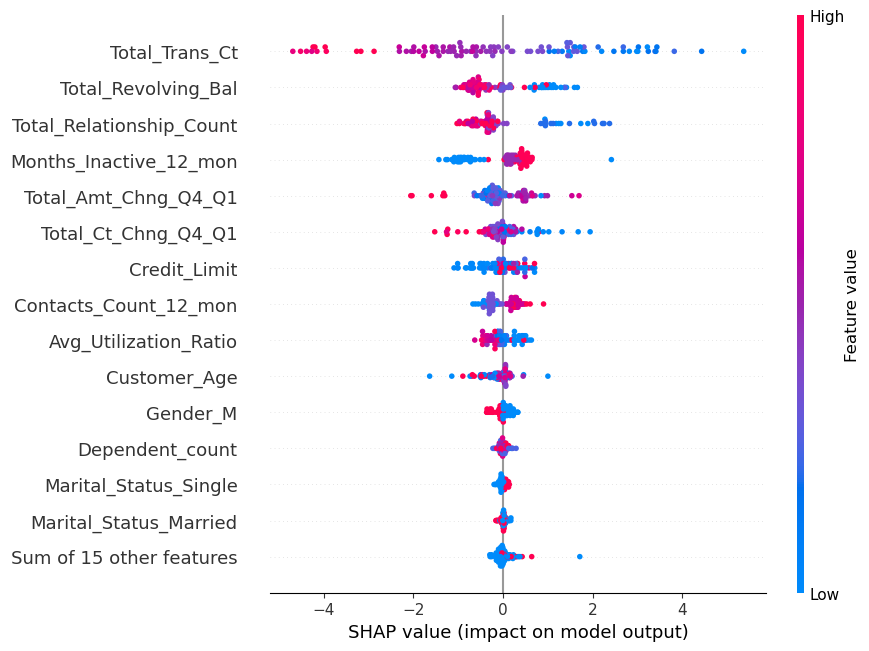

In [46]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(xgb_model, X_train_df)

# Sample 100 rows from test set for speed and clarity
X_test_sample = X_test_df.sample(100, random_state=42)

# Compute SHAP values
shap_values = explainer(X_test_sample)

# Plot global SHAP summary
shap.plots.beeswarm(shap_values, max_display=15)

# Plot summary
#shap.summary_plot(shap_values, X_test_sample, plot_type='bar', max_display=15, show=False)
#plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')

**SHAP Summary Plot (mean |SHAP| values)**

This shows both *importance* and *direction* of feature contributions using *SHAP values*, offering model interpretability at the feature level.

---

**Key Insights**

| *Feature*                  | *SHAP Impact*                                                                 |
|---------------------------|-------------------------------------------------------------------------------|
| *Total_Trans_Ct*           | Most impactful overall; more transactions → lower churn.                      |
| *Total_Revolving_Bal*      | High balance → lower churn.                              |
| *Total_Relationship_Count* | More relationships → less likely to churn.                                    |
| *Months_Inactive_12_mon*   | More inactive months → increased churn.                                       |


**Unique Benefits of SHAP**

- Shows *directionality*: e.g., high *Total_Trans_Ct* pushes prediction toward non-churn  
- Detects *interactions*  


## 5. Save Trained Model

In [50]:
import joblib

# Save the trained XGBoost model to a file
joblib.dump(xgb_model, 'xgboost_churn_model.pkl')

['xgboost_churn_model.pkl']

In [52]:
!pip install fpdf2

  Using cached fpdf2-2.8.3-py2.py3-none-any.whl.metadata (69 kB)
Using cached fpdf2-2.8.3-py2.py3-none-any.whl (245 kB)
